# Regression

In this notebook are some exercises to gain more experience with the Regression techniques we've discussed in class. You'll get some practice fitting models, and gain a stronger theoretical understanding of the technique as well. We'll also introduce some new important concepts that we didn't have time to cover in class

In [14]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## SLR

Explain how simple linear regression works. Suppose we go out and collect some data, $X$ a single feature and $y$ the target variable. If the true relationship between $y$ and $X$ is $y = X + \epsilon$, what should the output of SLR be?  Now suppose we mistakenly misclassify $X$ as the target and $y$ as the feature and regress $X$ on $y$. What would you expect to happen to the estimate $\hat{\beta_1}$? What about in the limit as the variance of $\epsilon$ goes to $\infty$?

## Code here or write here
For each data $i$, the following is true for a linear regression
$$
y_i = \beta_0 + \beta_1 X_i + \epsilon_i,
$$









The outputs are the best parameters $\hat{\beta_0}$ and $\hat{\beta_1}$ that describe the dataset, and are obtained by minimizing the mean square error:
$$
\hat{\beta_1} = \frac{\sum_{i=1}^n\left(X_i - \overline{X}\right)\left(y_i - \overline{y}\right)}{\sum_{i=1}^n\left(X_i - \overline{X}\right)^2} = \frac{\text{cov}(X,y)}{\sigma^2_{X}}, \text{ and}
$$
<br>
$$
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{X}.
$$








## Code here or write here
If we missclasify $X$ as the target and $y$ as the feature, we just have a linear transformation $X \rightarrow y-\epsilon$ and then
$$
\hat{\beta_1} = \frac{\text{cov}(y-\epsilon,X)}{\sigma^2_{y-\epsilon}} = \frac{\text{cov}(y-\epsilon,X)}{\sigma^2_{y}+\sigma^2_{\epsilon}}
$$
If $\sigma_\epsilon \rightarrow \infty$, then $\hat{\beta_1} \rightarrow 0$, and it'd be impossible to predict the value of $X$ (or $y$)








#### An Introduction to Maximum Likelihood Estimation (MLE)

In this question we'll introduce the concept of maximum likelihood estimation to derive the formula for $\hat{\beta_1}$. Assume the standard SLR assumptions. Let $y$ denote the target variable, let $X$ denote the feature variable and suppose the true relationship between $y$ and $X$ is $y = \beta_0 + \beta_1 X + \epsilon$. As usual assume there are $n$ observations.

For now let's look at the first observation, $(X_1,y_1)$. The likelihood of observing $y_1$ given $X_1$ is
$$
f\left(y_1|x_1;\beta_0,\beta_1\right) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2}\frac{\left(y_1 - \left(\beta_0 + \beta_1 x_1\right)\right)^2}{\sigma^2}\right)
$$
because we have assumed that $\epsilon\sim N(0,\sigma^2)$. You can think of this as the probability of observing $y_1$ given $x_1$ and our model parameters. The goal of maximum likelihood estimation is to choose the parameters, in this case $\beta_0$ and $\beta_1$, that maximize the likelihood. 

Because we've assumed independence of our observations the likelihood of observing $y$ given $X$ is:
$$
f\left(y|X;\beta_0,\beta_1\right) = \prod_{i=1}^n f\left(y_i|X_i;\beta_0,\beta_1\right) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2}\frac{\left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2}{\sigma^2}\right)
$$

Take the partial derivatives of $f\left(y|X;\beta_0,\beta_1\right)$ with respect to $\beta_0$ and $\beta_1$, then set these equal to $0$ and solve to find the maximum likelihood estimator for simple linear regression.

Hint: Try maximizing $\log\left(f\left(y|X;\beta_0,\beta_1\right)\right)$ instead, because $\log$ is a strictly increasing function this is the same as maximizing $f\left(y|X;\beta_0,\beta_1\right)$.

In [4]:
## Code here or write here










In [5]:
## Code here or write here










In [6]:
## Code here or write here










In [7]:
## Code here or write here










#### Prediction Intervals for SLR

Recall our discussion on confidence intervals for $E(y|X=X^*)$ in Notebook 2.

In addition to a confidence interval for the conditional mean, you can also produce what are known as prediction intervals for $y|X=X^*$, which give us a sense of what reasonable lower and upper bounds are for $y|X=X^*$ for a given confidence level, $1-\alpha$.

Recall that the $(1-\alpha)$ confidence interval formula for $E(y|X=X^*)$ was given by:
$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{\frac{1}{n} + \frac{\left(X^* - \overline{X}\right)^2}{(n-1)s_X^2}},
$$

The formula for the $(1-\alpha)$ prediction interval is quite similar:
$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{1 + \frac{1}{n} + \frac{\left(X^* - \overline{X}\right)^2}{(n-1)s_X^2}},
$$
to see a derivation of this formula check out, <a href="https://online.stat.psu.edu/stat414/node/298/">https://online.stat.psu.edu/stat414/node/298/</a>, and note that what they refer to as MSE is $\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}$. The addition of $1$ in the second square root refelects the extra uncertainty involved in predicting the actual $y$ value for a value of $X$, and comes from the error term in the statistical models, $\epsilon$. This does not show up with the confidence interval because remember $E(\bullet)$ is linear and $E(\epsilon)$ is assumed to be $0$.

Return to the `baseball` data and produce a $98\%$ prediction interval around the regression line created by regressing `W` on `RD`.

In [15]:
## Code here or write here

# Use pandas to import the data
# it is stored in the baseball_run_diff.csv file
from sklearn.linear_model import LinearRegression
baseball = pd.read_csv("../Lectures/Regression/baseball_run_diff.csv")


# This will tell us about the df
print("There are",len(baseball),"observations in the baseball df.")
print("The columns are",list(baseball.columns))

# Look at 5 randomly sampled rows
baseball.sample(5)

# first make a copy of the original dataframe
# this is due to the way python internally 
# stores objects
baseball_copy = baseball.copy()

# Now use sample to make a random sample
# frac allows us to choose a fraction of the df
# it is common to set aside 25% for testing
baseball_train = baseball_copy.sample(frac = .75, random_state = 440)

# now use drop and the train index to make test
baseball_test = baseball_copy.drop(baseball_train.index)


# make the model object
reg = LinearRegression(copy_X = True)

# fit the model
reg.fit(baseball_train.RD.values.reshape(-1,1),baseball_train.W.values.ravel())

# predict
pred = reg.predict(baseball_train.RD.values.reshape(-1,1))


# Now get the residuals
res = baseball_train.W.values.ravel() - pred





There are 540 observations in the baseball df.
The columns are ['teamID', 'yearID', 'lgID', 'G', 'W', 'L', 'R', 'RA', 'RD']


In [16]:
## Code here or write here
from scipy.stats import t

# We'll write a function that takes in X, X_star, alpha,
# and the residuals and produces a prediction interval
def get_pi(X, X_star, res, alpha):
    # Get n
    n = len(res)

    # The first square root we'll denote root_1
    # remember our residuals were stored in res
    root_1 = np.sqrt(np.sum(np.power(res,2))/(n-2))
    
    # This is the second square root, we'll call it root_2
    root_2 = np.sqrt(1+(1/n) + np.power((X_star-np.mean(X)),2)/((n-1)*np.var(X)))
    
    # get t_stat
    # this is done using t.ppf 1-alpha goes first then the df
    t_stat = t.ppf(1-alpha/2, n-2)
    
    # Now we calculate y_hat
    y_hat = reg.predict(np.array(X_star).reshape(-1,1))
    
    # Now put it all together
    lb = y_hat - t_stat*root_1*root_2
    ub = y_hat + t_stat*root_1*root_2
    
    return lb,ub



lb,ub = get_pi(baseball_train.RD.values,40,res,0.05)

print("A 95% prediction interval for the average wins of a team with 40 rd is",
         lb[0],ub[0])







A 95% prediction interval for the average wins of a team with 40 rd is 76.9374663493468 93.22454713742167


In [21]:
get_pi(baseball_train.RD.values,40,res,0.05)

(array([76.93746635]), array([93.22454714]))

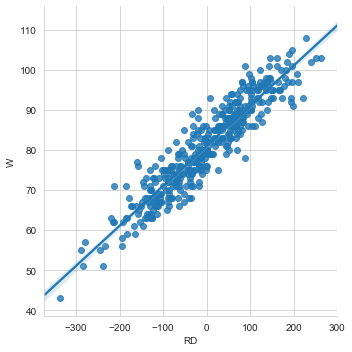

In [20]:
## Code here or write here
sns.lmplot(data=baseball_train, x="RD", y="W")








In [ ]:
## Code here or write here










## Multiple Linear Regression

Return to the `beer` data set. Fit the following model:
$$
\text{IBU} = \beta_0 + \beta_1 \text{ABV} + \beta_2 \text{Stout} + \beta_3 \text{Stout} \times \text{ABV} + \epsilon
$$

Then interpret the following, $\hat{\beta_1},\hat{\beta_2},\hat{\beta_3}$.

In [28]:
## Code here or write here
# Read in the csv
beers = pd.read_csv("../Lectures/Regression/beer.csv")

# train test split
beers_copy = beers.copy()

# Then locate all the stouts and set Stout to 1
beers_copy['Stout'] = 0
beers_copy.loc[beers_copy.Beer_Type == "Stout",'Stout'] = 1

beers_train = beers_copy.sample(frac=.75,random_state = 614)
beers_test = beers_copy.drop(beers_train.index)

beers_train.head()




,Beer_Name,IBU,ABV,Rating,Beer_Type,Stout
54,Shakespeare Oatmeal Stout,60,5.7,3.722,Stout,1
3,Dragon’s Milk,31,11.0,4.062,Stout,1
281,Road 2 Ruin Double IPA,78,8.0,3.836,IPA,0
292,Hercules Double IPA,85,10.0,3.831,IPA,0
345,White Rajah,70,6.8,4.015,IPA,0


In [29]:
## Code here or write here

#make interaction term 
beers_train['Stout_ABV'] = beers_train['Stout']*beers_train['ABV']

## now make and fit the model
reg = LinearRegression(copy_X = True)

reg.fit(beers_train[['ABV','Stout','Stout_ABV']],beers_train['IBU'])






LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
## Code here or write here
print("beta_0_hat is",np.round(reg.intercept_,5))
print("beta_1_hat is",np.round(reg.coef_[0],5))
print("beta_2_hat is",np.round(reg.coef_[1],5))
print("beta_3_hat is",np.round(reg.coef_[2],5))









beta_0_hat is 15.68659
beta_1_hat is 7.43576
beta_2_hat is -6.54521
beta_3_hat is -3.213


$\hat{\beta_1},\hat{\beta_2},\hat{\beta_3}$:

$\hat{\beta_1}+\hat{\beta_3}$ corresponds to the increase per unit $ABV$ if the beer is a stout, and having an intercept of $\hat{\beta_0}+\hat{\beta_2}$. If the beer is not a stout, there's no interaction term, and we're talking a simple linear regression problem. This can be seen in the plot below.

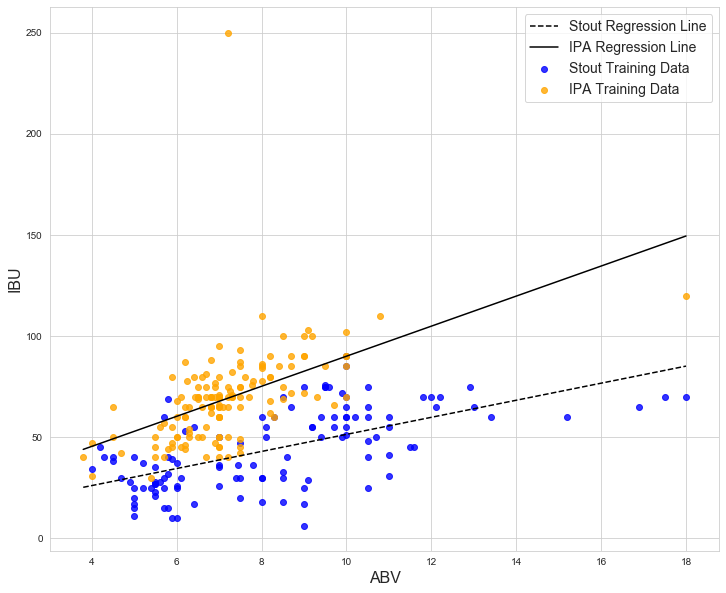

In [34]:
## Code here or write here


# We can plot the two lines by limiting our prediction input
stout_values = np.ones((100,3))

# make the ABV values
stout_values[:,0] = np.linspace(beers_train['ABV'].min(),beers_train['ABV'].max(),100)

# now the interaction term
stout_values[:,2] = stout_values[:,0]*stout_values[:,1]

# make a stout prediction
stout_pred = reg.predict(stout_values)

# # make ipa values
ipa_values = np.zeros((100,3))
ipa_values[:,0] = np.linspace(beers_train['ABV'].min(),beers_train['ABV'].max(),100)
ipa_values[:,2] = ipa_values[:,0]*ipa_values[:,1]
ipa_pred = reg.predict(ipa_values)

# Let's plot
plt.figure(figsize=(12,10))

# plot stout values
plt.scatter(beers_train.loc[beers_train.Stout == 1,'ABV'], 
               beers_train.loc[beers_train.Stout == 1,'IBU'],
               c = 'blue', alpha = .8, label="Stout Training Data")

# plot the stout line
plt.plot(stout_values[:,0], stout_pred, "k--", label="Stout Regression Line")

# # plot ipa values
plt.scatter(beers_train.loc[beers_train.Stout == 0,'ABV'], 
               beers_train.loc[beers_train.Stout == 0,'IBU'],
               c = 'orange', alpha = .8, label="IPA Training Data")

# plot the ipa line
plt.plot(ipa_values[:,0], ipa_pred, "k", label="IPA Regression Line")

plt.legend(fontsize = 14)

plt.xlabel("ABV",fontsize=16)
plt.ylabel("IBU",fontsize=16)

plt.show()





Again using the `beer` data build a regression model that best predicts `Rating`.

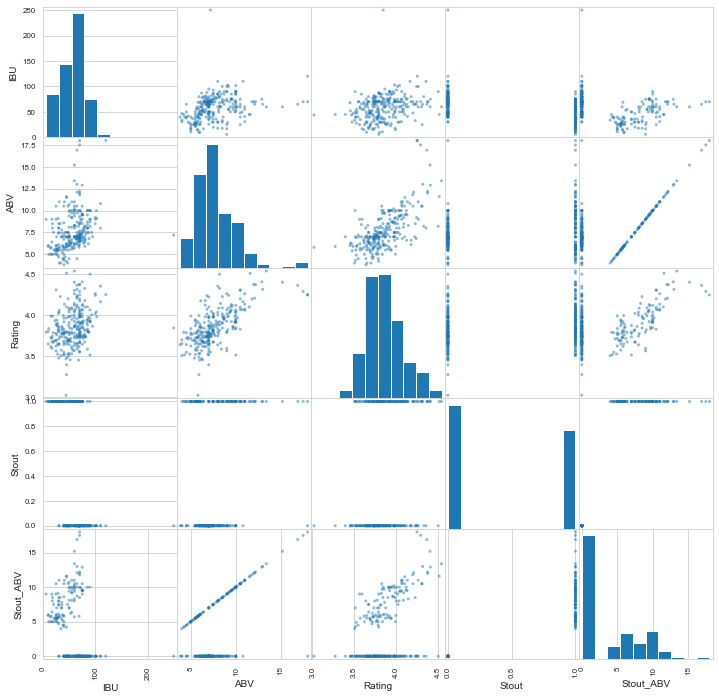

In [35]:
## Code here or write here
from pandas.plotting import scatter_matrix

scatter_matrix(beers_train, figsize=(12,12))

plt.show()







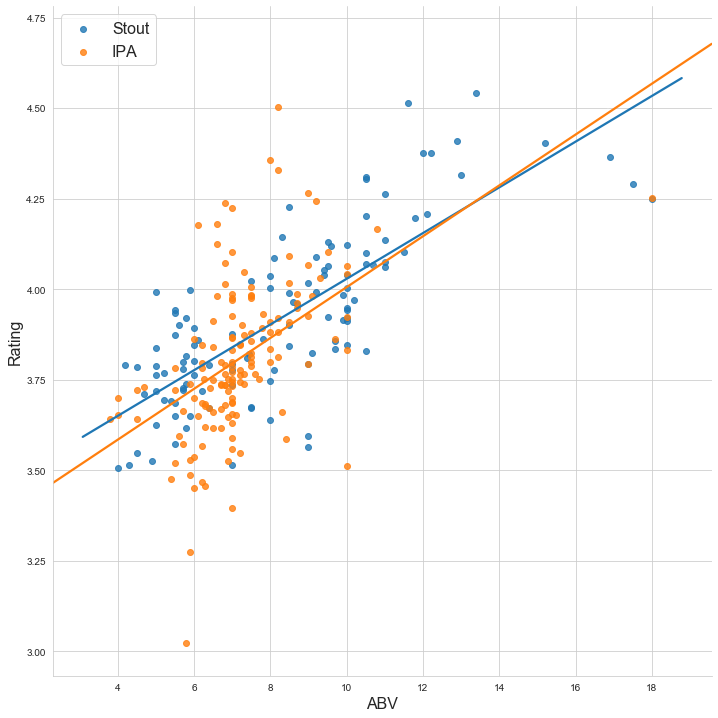

In [49]:
## Code here or write here

sns.lmplot(data=beers_train, x="ABV", y="Rating",hue = "Beer_Type", height=10,  
           ci = False, legend=False)

plt.xlabel("ABV", fontsize=16)
plt.ylabel("Rating", fontsize=16)

plt.legend(fontsize=16)

plt.show()







In [53]:
## Code here or write here


reg = LinearRegression(copy_X = True)

reg.fit(beers_train[['ABV']],beers_train['Rating'])
print("beta_0_hat is",np.round(reg.intercept_,5))
print("beta_1_hat is",np.round(reg.coef_[0],5))
# predict
pred = reg.predict(beers_train.ABV.values.reshape(-1,1))

# Now get the residuals
res = beers_train.Rating.values.ravel() - pred


beta_0_hat is 3.34272
beta_1_hat is 0.06716


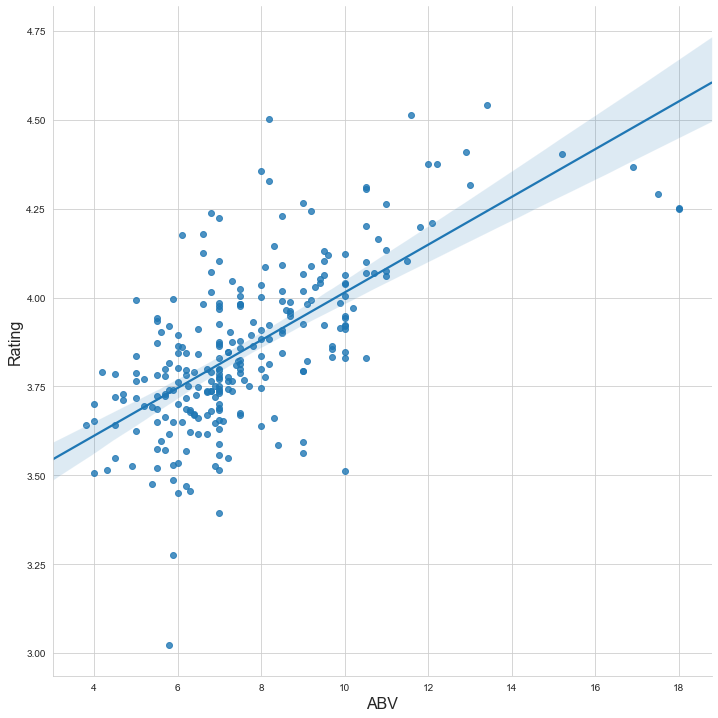

In [48]:
sns.lmplot(data=beers_train, x="ABV", y="Rating", height=10)

plt.xlabel("ABV", fontsize=16)
plt.ylabel("Rating", fontsize=16)

# plt.legend(fontsize=16)

plt.show()

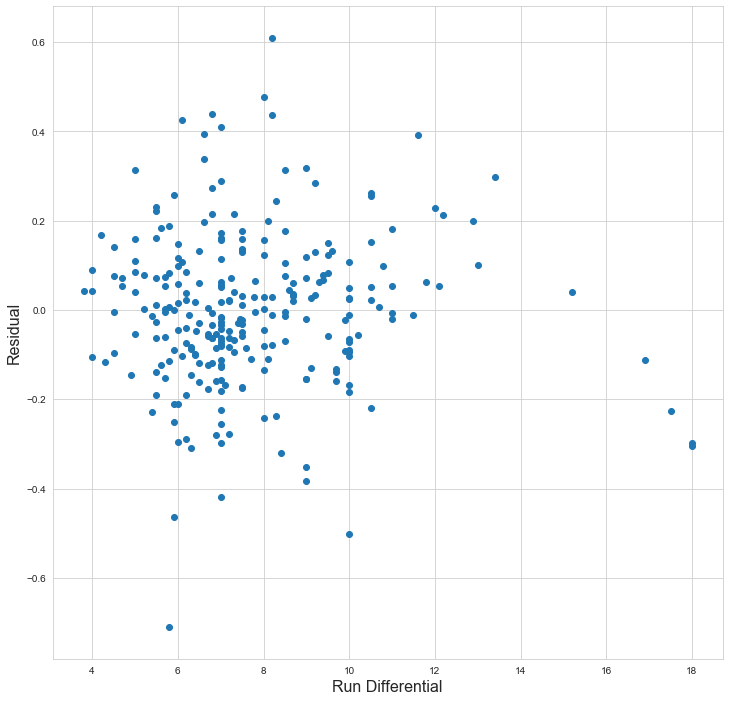

In [55]:
## First plot of rd vs residual

plt.figure(figsize = (12,12))

plt.scatter(beers_train.ABV,res)

plt.xlabel("Run Differential", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.show()

#### Statistical Significance for MLR Models

Below we fit a model for the `beer` data using the `statsmodel` package 

In [50]:
beer = pd.read_csv("https://raw.githubusercontent.com/erdosinstitute/PythonCurriculum/master/Lectures/Regression/beer.csv")
beer['Stout'] = 0
beer.loc[beer.Beer_Type == 'Stout','Stout'] = 1
beer['const'] = 1
beer['Stout_ABV'] = beer['Stout'] * beer['ABV']

In [57]:
beer

,Beer_Name,IBU,ABV,Rating,Beer_Type,Stout,const,Stout_ABV
0,Guinness Draught,45,4.2,3.792,Stout,1,1,4.2
1,Breakfast Stout,60,8.3,4.145,Stout,1,1,8.3
2,Milk Stout Nitro,25,6.0,3.951,Stout,1,1,6.0
3,Dragon’s Milk,31,11.0,4.062,Stout,1,1,11.0
4,Old Rasputin,75,9.0,4.018,Stout,1,1,9.0
...,...,...,...,...,...,...,...,...
342,Citra Ass Down,68,8.2,3.922,IPA,0,1,0.0
343,Golden Nugget IPA,45,6.8,4.000,IPA,0,1,0.0
344,Le Freak,101,9.2,3.778,IPA,0,1,0.0
345,White Rajah,70,6.8,4.015,IPA,0,1,0.0


In [51]:
import statsmodels.api as sm 

In [52]:
slr = sm.OLS(beer['IBU'], beer[['const','ABV','Stout','Stout_ABV']])

fit = slr.fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    IBU   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     111.3
Date:                Sat, 09 May 2020   Prob (F-statistic):           2.39e-50
Time:                        15:42:18   Log-Likelihood:                -1478.1
No. Observations:                 347   AIC:                             2964.
Df Residuals:                     343   BIC:                             2980.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4825      6.010      1.744      0.0

Look at this annotated version of the summary.
<img src="MLR_F.png" style="width:70%;"></img>
The circled portion of the table is the $F$-statistic and the $p$-value associated with the following hypothesis test:
$$
\text{H}_0: \beta_1 = \beta_2 = \beta_3 = 0 \text{ vs. H}_A: \text{one of }\beta_i\neq 0, \ i=1,2,3.
$$
This test allows you to say whether any of your predictors are significantly associated with the target $y$, when compared to the baseline model of $y=E(y)$.

Return to your final `carseats` model from class. What is the $F$-statistic and associated $p$-value?

In [56]:
## Code here or write here
carseats = pd.read_csv("../Lectures/Regression/carseats.csv")

carseats_copy = carseats.copy()
carseats_train = carseats_copy.sample(frac=.75, random_state=440)
carseats_test = carseats_copy.drop(carseats_train.index)

carseats_train.head()










,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
328,3.15,117,66,1,65,111,Bad,55,11,Yes,Yes
266,9.10,128,93,12,343,112,Good,73,17,No,Yes
310,9.53,175,65,29,419,166,Medium,53,12,Yes,Yes
96,9.48,147,42,10,407,132,Good,73,16,No,Yes
101,6.20,128,93,0,89,118,Medium,34,18,Yes,No


In [58]:
## Code here or write here


slr = sm.OLS(carseats['Sales'], carseats[['Advertising','Price']])

fit = slr.fit()

print(fit.summary())







                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              837.1
Date:                Sat, 09 May 2020   Prob (F-statistic):                   2.55e-143
Time:                        16:06:05   Log-Likelihood:                         -1069.8
No. Observations:                 400   AIC:                                      2144.
Df Residuals:                     398   BIC:                                      2152.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










## Model Selection Algorithms

Here we'll describe two additional model selection algorithms.

### Forwards Selection

Say you have $m$ predictors $X_1,\dots,X_m$, and a target $y$. 

Starting with an empty model you build $m$ simple linear regression models and then choose the one with lowest testing error (for instance by looking at the average cv error). Call this model $1$. 

Take model $1$ and go through the remaining $m-1$ features and add them one at a time to model $1$. This will give you $m-1$ two feature models. Look at the one with lowest testing error, call it model $2$. If model $2$ has lower testing error than model $1$ continue in this way and look at the remaining $m-2$ predictors. If model $1$ has the lower testing error you stop and model $1$ is the model you choose.

You continue until you either find a model with lowest testing error (for example if model $3$ had lower testing error than model $4$ you chose model $3$), or until you have built the model regressing $y$ on all of $X_1,\dots,X_m$.

### Backwards Selection

This algorithm is sort of the opposite of forwards selection.

Again say you have $m$ predictors $X_1,\dots,X_m$ and a target $y$.

Starting with the model regressing $y$ on all of $X_1,\dots,X_m$, remove each of the $X_i$ predictors one at a time, regressing $y$ on the remaining $m-1$ features. If one of these models has lower testing error than the full model take it and call it model $1$. If none of those models has lower testing error than the full model stick with the full model.

Take model $1$ and remove each of the $m-1$ predictors one at a time, regressing $y$ on the remaining $m-2$ features. If one of those models has lower testing error than model $1$ take it and call it model $2$. If none of those models has lower testing error than model $1$ stick with model $1$.

Continue in this way until you have a reduced model with lowest testing error, or until you end up with the model with no predictors, i.e. $y = E(y)$.

#### Greedy Algorithms

These are both <i>greedy algorithms</i> because at each step you take the move that benefits you the most in the moment, but you don't explore suboptimal paths that may be better in the long run. While you may not get the best model, you're willing to go with a model that is close to correct in a faster time. Both of these algorithms at worst require fitting $m!$ models as opposed to the $2^m$ models required for the brute force approach.

#### The Problem

Choose one of either forwards or backwards selection and program the algorithm to build a model to predict `Sales` from the `Advertising` data.

In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










## Regularization 

### How to Calculate Ridge Regression Coefficients

Recall that finding the ridge regression coefficients involves minimizing the following:
$$
||y-X\beta||_2^2 + \alpha ||\beta||_2^2.
$$
But, this can be rewritten like so:
$$
(y-X\beta)^T(y-X\beta) + \alpha \beta^T \beta.
$$

Using that rewriting and some matrix calculus you can find the the formula for $\hat{\beta}$ is
$$
\hat{\beta} = \left(X^T X + \alpha I \right)^{-1} X^T y.
$$

Write code using `numpy` to find the ridge regression coefficients for the following data. Remembering to include the normalizing step using `StandardScaler`. Fit the data with a high degree polynomial.

In [ ]:
x_train = 3*(np.pi/2)*np.random.random(500) - 2*np.pi
y_train = np.sin(x_train) + .3*np.random.randn(500)

x_test = 3*(np.pi/2)*np.random.random(500) - 2*np.pi
y_test = np.sin(x_test) + .3*np.random.randn(500)

In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










### Elastic Net

Elastic Net is a regularization regression algorithm that strives to set a middle ground between ridge regression and lasso. Here we set out to minimize:
$$
MSE + r\alpha ||\beta||_1 + \frac{1-r}{2}\alpha ||\beta||_2^2, \text{ for } r \in [0,1].
$$

$r$ is another hyperparameter, when $r=1$ we recover ridge regression. If $r=0$ we recover lasso.

Find the best elastic net model that includes all of the features from this `auto` data set to predict `mpg`. Use cv find the best values for $r$ and $\alpha$. You can read the `ElasticNet` documentation here, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html</a>.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
auto = pd.read_csv("auto.csv")

In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










## Gradient Descent

So far in class and in this HW we've learned precise formulas for the coefficients of our estimators. Let's recall that for OLS we have:
$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Notice that this process involves calculating the inverse of $X^T X$, which can get quite large when the number of features grows. Computing the inverse of a large matrix is computationally strenuous so it is at times desirable to have a method that doesn't involve calculating the inverse.

One approach is gradient descent. 

Recall that we want to minimize MSE which is equal to:
$$
MSE(\beta) = \frac{1}{n}(X\beta - y)^T(X\beta - y)
$$
If we remember some Calculus III we'll remember that for a particular value of $\beta$, say $\beta^*$, the direction of greatest descent at $\beta^*$, i.e. how to get to the minimum most quickly from $\beta^*$, is the opposite direction of the gradient, $\nabla MSE(\beta^*)$.

Using some matrix calculus we see that:
$$
\nabla MSE(\beta^*) = \frac{2}{n} X^T (X\beta^* - y)
$$

#### How to Turn This Into an Algorithm

In order to leverage gradient descent we make a random guess for $\beta$, say $\beta^{(0)}$, calculate the gradient there then move a little bit, say $\eta$, in the direction of gradient descent. We subtract $\eta \nabla MSE(\beta^{(0)})$ from $\beta^{(0)}$ and use that as $\beta^{(1)}$. Do this process $N$ times and we'll approach $\hat{\beta}$. So the process is:

$$
\beta^{(0)} = \beta^*,\text{ some random guess. Then for step } k+1
$$
$$
\beta^{(k+1)} = \beta^{(k)} - \eta \nabla MSE(\beta^{(k)}) = \beta^{(k)} - \eta \frac{2}{n} X^T (X\beta^{(k)} - y), k = 1,\dots,N
$$

#### The HW Problem

Write a function using `numpy`, that takes in $y, X, \eta,$ and $N$ and returns the gradient descent estimate. Test it on the data generated below. Then compare it to what you get using `SGDRegressor`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html</a>. 

In [ ]:
X = np.random.randn(5000,1000)

y = X.dot(np.random.randint(-5,5,1000)) + 2*np.random.randn(5000)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










Gradient descent is an important technique that is incredibly useful. We'll see it again later in the course.

## Miscellanious Regression

Load the following dataset, then find the best predictive model for predicting `y`.

In [ ]:
df = pd.read_csv("hw_reg.csv")

In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here










In [ ]:
## Code here or write here








